## In this lab session we will implement two algorithms (an algorithm for sorting and one for detecting communities) each in two different ways: a naive, less efficient way and a better, faster way

### Fill in the CODE_HERE placeholders and check your code by evaluating the boxes with assert statements

### Make sure to evaluate every box

In [3]:
from collections import defaultdict
from itertools import count

import time
import copy
import numpy as np

import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import networkx as nx

### Let's start with the sorting algorithm
We will create multiple data sets of integers we want to sort <br>
Each data set bigger than the previous one <br>
These different sized data sets will be used to see how computation time increases with the increasing size of the data set

In [4]:
def apply_and_time_sorting(datasets, sort_function):
    timings = []
    for dataset in datasets:
        start = time.time()
        sort_function(dataset)
        end = time.time()
        time_difference = end - start
        timings.append(time_difference)
    return timings

In [5]:
datasets = []
for data_size in [5000,10000,20000]:
    datasets.append(np.random.permutation(data_size))

### Here we will implement the naive insertion sorting algorithm 
It's an algorithm that sorts an array in-place by iterating over the elements and inserting the current element
in the part of the array that is already sorted

```python
[1,11,13,7,4,8,0]
```

If the current element is 7, then the part of the algorithm before 7 is already sorted by the algorithm <br>
It then tries to find the position to insert the element 7 in the part of the array that is already sorted <br>
Resulting in

```python
[1,7,11,13,4,8,0]
```

The next element to be sorted is 4

In [4]:
def naivesort(data):
    """
    sorts the data in place
    """
    for i, element in enumerate(data):
        j = i
        #iterate back into the array as long as the current element is smaller than the previous one
        while j>0 and CODE_HERE: 
            data[j] = CODE_HERE #put the previous larger element in the position of the current one
            j -= 1
        data[j] = CODE_HERE # store the current element in its sorted position

In [ ]:
data = np.random.permutation(10)
naivesort(data)
assert np.all(data == np.array([0,1,2,3,4,5,6,7,8,9]))

In [5]:
timings = apply_and_time_sorting(datasets, naivesort)
print(timings)

[3.3301758766174316, 13.44826602935791, 53.72974395751953]


### Let's compare this with the quicksort algorithm that was discussed in class

In [6]:
datasets = []
for data_size in [5000,10000,20000]:
    datasets.append(np.random.permutation(data_size))

In [6]:
def swap(l, i, j):
    """
    swaps element in position i to position j and vice versa in the list l
    """
    tmp = l[j]
    l[j] = l[i]
    l[i] = tmp

def quicksort_helper(l, starti, endi):
    #set_trace()
    if starti >= endi:
        return
    #if the data set contains less than 100 elements, using the naive insertion sort is better
    if endi-starti+1<=100:
        naivesort(l)
    else:
        middlei = int(0.5*(starti+endi))
        #first make sure the start, middle and end element are in sorted order
        if (l[middlei]<l[starti]):
            swap(l,CODE_HERE, CODE_HERE)
        if (l[endi]<l[starti]):
            swap(l, CODE_HERE, CODE_HERE)
        if (l[endi]<l[middlei]):
            swap(l, CODE_HERE, CODE_HERE)
        pivoti = middlei
        
        #put the pivot element just before the last 
        swap(l, CODE_HERE, CODE_HERE)
        pivot = l[endi-1]
        lefti = starti+1
        righti = endi-2
        
        #now make sure the elements are partially sorted,
        #i.e. elements in the first half should be smaller than the pivot element
        #the elements in the second half should be larger than the pivot element
        while True:
            #move the lefti cursor from left to right until you encounter an element larger than the pivot
            while l[lefti]<pivot: 
                CODE_HERE
            #move the righti cursor from right to left until you encounter an element smaller than the pivot
            while pivot<l[righti]: 
                CODE_HERE
            #if the lefti cursor is still lower than the righi cursor, swap them, otherwise break out of the loop
            if lefti < righti:  
                swap(l, CODE_HERE, CODE_HERE)
            else:
                break
                
        pivoti = lefti
        swap(l, pivoti, endi-1)
        #recursive sort the first half of the array
        quicksort_helper(l, starti, pivoti-1)
        #recursive sort the second half of the array
        quicksort_helper(l, pivoti+1, endi)
        
def quicksort(l):
    quicksort_helper(l, 0, len(l)-1)

In [ ]:
data = np.random.permutation(10)
quicksort(data)
assert np.all(data == np.array([0,1,2,3,4,5,6,7,8,9]))

In [8]:
timings = apply_and_time_sorting(datasets, quicksort)
print(timings)

[2.3237593173980713, 5.688272953033447, 16.637247800827026]


## The next algorithm we will investigate is the community detection algorithm: the Louvain method

### As a simple example we will take the social network of a karate club collected by Zachary, the members have a link between them in case they interacted with each other outside the club. The goal is to find the communities that exist in the club

In [9]:
file = "./data/karate_edges_78.txt"

### Let's first create the adjacency matrix for the social network

In [10]:
def create_adjacency_matrix(file):
    node_neighbors = defaultdict(list)

    with open(file, "r") as fin:
        for line in fin:
            node_1, node_2 = line.strip().split('\t')
            node_1 = int(node_1)-1 #offset to make the integers start from zero
            node_2 = int(node_2)-1
            node_neighbors[node_1].append(node_2)

    number_of_nodes = len(node_neighbors)
    A = np.zeros((number_of_nodes, number_of_nodes))

    for node, neighbors in node_neighbors.items():
        for neighbor in neighbors:
            A[node, neighbor] = 1

    return A

In [11]:
A = create_adjacency_matrix(file)

### Compute the total sum of edges in the adjacency matrix A (divided by 2)
Hint: use np.sum

In [ ]:
m = 0.5*np.sum(A)

### Let's now define a function to compute the modularity of the network given the adjacency matrix A, the communities and the total sum of edge weights
Hint: look at the modularity formula in the course slides

In [13]:
def compute_modularity(A, communities, m):
    """
    computes the modularity for a given network A and communities communities (see formula in slides)
    
    A: dense square matrix, nonzero element on row i and column j indicating 
        a weighted connection between vertex i and j
    communities: vector of communities, on position i the community for node i, so the length of the list equals 
        the number of nodes in the graph
    m: an integer that equals the sum of all edges in the graph divided by two
    """
    nrows, ncols = A.shape
    assert nrows == ncols
    nvertices = nrows

    modularity = 0.0
    #iterate over all pair of vertices
    for vertexi in range(nvertices):
        for vertexj in range(nvertices):
            #sum all the edge weight of vertexi
            ki = CODE_HERE
            #sum all the edge weight of vertexj
            kj = CODE_HERE
            #if both vertices are in the same community add a term to the modularity
            if communities[vertexi] == communities[vertexj]:
                modularity += CODE_HERE

    return modularity/(2*m)

### Compute the modularity putting every vertex/node in its own community

The community vector has the same length as the number of vertices/nodes in the graph <br>
Position i in the community vector defines the community of vertex/node i <br>
e.g. [0,0,1,1,1] means the first two vertices belong the community 0 and the last three to community 1

In [14]:
def initialize_communities(n_vertices):
    return CODE_HERE # use np.arange to create a vector from 0 to n_vertices-1
    
initial_communities = initialize_communities(A.shape[0])

### Now compute the modularity for the given adjancency matrix, the initial communities and the total sum of edges

In [16]:
initial_modularity = compute_modularity(A, initial_communities, m)

In [17]:
assert initial_modularity == -0.04980276134122286

### Now we will implement the first phase of the Louvain method but using a naive, inefficient way of computing the modularity difference

Let's first define some helper function to perform the local search (i.e. the first phase) <br>

The first helper function let's us compute the difference in modularity when we move a node from its current
community into another community <br>

We will (on purpose) compute this in a very naive inefficient way

In [18]:
def modularity_difference(A, communities, m, modularity, vertex, community):
    """
    A: the adjacency matrix of the graph
    communities: vector of communities, on position i the community for node i, so the length of the list equals 
        the number of nodes in the graph 
    m: an integer that equals the sum of all edges in the graph divided by two
    modularity: the modularity of the graph A with communities defined by the variable communities
    vertex: the index of the vertex/node you want to compute the modularity difference for when moving it to community
    community: the community to which you want move the vertex
    """
    #store the vertex' community in a variable
    original_community = CODE_HERE 
    #change community of the current vertex
    communities[vertex] = CODE_HERE
    #compute the new modularity use the compute_modularity function
    new_modularity = CODE_HERE
    #compute the difference between the new modulariy and the old one
    modularity_difference = CODE_HERE
    #restore original community of the vertex
    communities[vertex] = CODE_HERE
    return modularity_difference

In [19]:
test_A = np.array([
    [0,1,1,0,0,0],
    [1,0,1,0,1,0],
    [1,1,0,0,0,0],
    [0,0,0,0,1,1],
    [0,1,0,1,0,1],
    [0,0,0,1,1,0]
    ]
)
test_communities = np.arange(0,6)
test_m = 0.5*np.sum(A)
test_mod = compute_modularity(test_A, test_communities, test_m)
expected = [0.0, 0.01232741617357002, 0.012491781722550954, -0.0003287310979618672, -0.0004930966469428009, -0.0003287310979618672]
for vertexi in range(0,6):
    assert expected[vertexi] == modularity_difference(test_A, test_communities, test_m, test_mod, 0, vertexi)

### Now use the modularity_difference function to iterate over all communities and see which community for the given vertex gives the biggest increase in modularity

In [20]:
def find_best_community(A, communities, m, modularity, vertex):
    """
    A: the adjacency matrix of the graph
    communities: vector of communities, on position i the community for node i, so the length of the list equals 
        the number of nodes in the graph 
    m: an integer that equals the sum of all edges in the graph divided by two
    modularity: the modularity of the graph A with communities defined by the variable communities
    vertex: the index of the vertex/node for which you want to find the best community
    """    
    unique_communities = np.unique(communities)
    max_modularity_difference = 0
    best_community = communities[vertex]
    for community in unique_communities:
        #compute the modularity difference for the given vertex and the community by applying the 
        #before defined modularity_difference function
        modularity_diff = CODE_HERE
        #if the difference is larger than the maximum modularity difference, store the new difference
        #and set the best_community variable to this new community
        if modularity_diff > max_modularity_difference:
            max_modularity_difference = CODE_HERE
            best_community = CODE_HERE
    return best_community, max_modularity_difference

In [21]:
test_A = np.array([
    [0,1,1,0,0,0],
    [1,0,1,0,1,0],
    [1,1,0,0,0,0],
    [0,0,0,0,1,1],
    [0,1,0,1,0,1],
    [0,0,0,1,1,0]
    ]
)
test_communities = np.arange(0,6)
test_m = 0.5*np.sum(A)
test_mod = compute_modularity(test_A, test_communities, test_m)
assert find_best_community(test_A, test_communities, test_m, test_mod, 0)[0] == 2
assert find_best_community(test_A, test_communities, test_m, test_mod, 4)[0] == 3

### We will now use the find_best_community function to keep iterating over all nodes until we can't increase the modularity anymore

In [22]:
def reset_communities(communities):
    """
    reset the community vector so that the communities  start from zero
    
    Example:
    --------
    communities = [17,17,3,17,3,1,1,1,3,17]
    reset_communities(communities) == [0,0,1,0,1,2,2,2,1,0]
    """
    counter = count()
    community_mapper = defaultdict(lambda: next(counter))
    reset_communities = np.zeros((len(communities),), dtype=int)
    for vertex, community in enumerate(communities):
        reset_communities[vertex] = community_mapper[community]
    return reset_communities

def local_search(A, communities, m, modularity, seed=11):
    #we iterate over the vertices in a randomized way
    nvertices = len(communities)
    if seed>0:
        vertex_order = np.random.RandomState(seed=seed).permutation(nvertices)
    else:
        vertex_order = range(nvertices)

    is_modularity_increasing = True
    #keep iterating over the vertices until the modulariy stops increasing
    while is_modularity_increasing:
        is_modularity_increasing = False
        for vertex in vertex_order:
            #find the best community for the vertex using the find_best_community function
            best_community, modularity_difference = CODE_HERE
            #if the modulariy is strictly positive set the community of the vertex to the best_community
            if modularity_difference > 0:
                communities[vertex] = CODE_HERE
                modularity += CODE_HERE #update the modularity with the difference
                is_modularity_increasing = True #set the flag that indicates the modularity is still increasing

    communities = reset_communities(communities) #just reindexing the new communities so they start from zero

    return communities, modularity

In [23]:
test_A = np.array([
    [0,1,1,0,0,0],
    [1,0,1,0,1,0],
    [1,1,0,0,0,0],
    [0,0,0,0,1,1],
    [0,1,0,1,0,1],
    [0,0,0,1,1,0]
    ]
)
test_communities = np.arange(0,6)
test_m = 0.5*np.sum(A)
test_mod = compute_modularity(test_A, test_communities, test_m)
assert np.all(local_search(test_A, test_communities, test_m, test_mod)[0] == np.array([0,0,0,1,1,1]))

### Next we implement the second phase of the Louvain method
This step reduces the network where all nodes, that belong to the same community, are now reduced into one node <br>
The new weight between two nodes is the sum of all the edge weights between their respective communities <br>
The weight of the self-link is the sum of all weights between the original nodes of the community <br>

Example <br>

Original adjacency matrix <br>
```python
    [
        [0,1,1,0],
        [1,0,1,0],
        [1,1,0,1],
        [0,0,1,0]
    ]
```
with communities <br>
```python
    [0,0,0,1]
```
will reduce to <br>
```python
    [
        [6,1],
        [1,0]
    ]
```
with communities <br>
```python
    [0,1]
```

In [24]:
def reduce_network(A, communities):
    #assumes communities starting from zero increasing by one
    unique_communities = np.unique(communities)
    n_communities = len(unique_communities)
    #initialize the new reduced adjacency matrix as a zero square matrix of dimension n_communities
    reduced_A = CODE_HERE

    #now let's fill in all the entries in the reduced_A matrix 
    #(note that this can be done more efficiently because the matrix is symmetric) 
    for communityi in unique_communities:
        for communityj in unique_communities:
            #find all the vertex indices that belong to communityi 
            #(hint: use np.argwhere and don't forget to flatten the array)
            vertices_i = CODE_HERE
            #find all the vertex indices that belong to communityj 
            vertices_j = CODE_HERE
            #select the sub matrix of all the vertices in communityi and communityj
            sub_A = A[vertices_i,:]
            sub_A = sub_A[:,vertices_j]
            #the edge weight between communityi and communityj is the sum of the weights
            #between all the vertices of communities communityi and communityj
            reduced_A[communityi, communityj] = CODE_HERE

    #put each vertex in the reduced network again in its own community
    communities = np.array([i for i in range(reduced_A.shape[0])], dtype=int)
    
    return reduced_A, communities

In [25]:
test_A = np.array([
    [0,1,1,0,0,0],
    [1,0,1,0,1,0],
    [1,1,0,0,0,0],
    [0,0,0,0,1,1],
    [0,1,0,1,0,1],
    [0,0,0,1,1,0]
    ]
)
test_communities = [0,0,0,1,1,1]
assert np.all(reduce_network(test_A, test_communities)[0] == np.array([[6,1],[1,6]]))

### Now we will combine the local_search function and the reduce_function to find the community structure with the highest modularity

In [26]:
def traceback_communities(reduced_communities, communities):
    #assumes community i after local search is also reduced to the i-th node
    new_communities = np.zeros((len(communities,)),dtype=int)
    for vertex, community in enumerate(communities):
        new_communities[vertex] = reduced_communities[community]
    return new_communities

def detect_communities(A, communities):
    m = 0.5*np.sum(np.sum(A))
    modularity = compute_modularity(A, communities, m)

    #first do a local_search to find better community structure using the local_search function
    local_communities, modularity = CODE_HERE

    #as long as we are able to further combine communities, we keep optimizing
    if len(np.unique(local_communities)) < len(communities):
        #reduce the network with the communities found by the previous local search
        reduced_A, reduced_communities = CODE_HERE
        #keep repeating these two phases (local_search and reduce_network) 
        #by a recursive call to detect_communities using the reduced network reduced_A and
        #the reduced communities reduced_communities
        #if this recursion makes your head explode, that's normal, don't worry
        reduced_communities = CODE_HERE
        #a function to trace back the communities of the original nodes using the reduced network communities
        expanded_communities = traceback_communities(reduced_communities, local_communities)
        return expanded_communities
    else:
        return communities

### Let's now apply the algorithm to the Karate Club network and compute the new modularity
Let's also time it to see how slow it is

In [27]:
start_time = time.time()
best_communities = detect_communities(A, initial_communities)
end_time = time.time()
print(f"Took {end_time-start_time} seconds to execute")

Took 20.622655868530273 seconds to execute


In [28]:
assert compute_modularity(A, best_communities, m) > 0.4

### Let's visualize the network with the optimal commmunities using the below functions

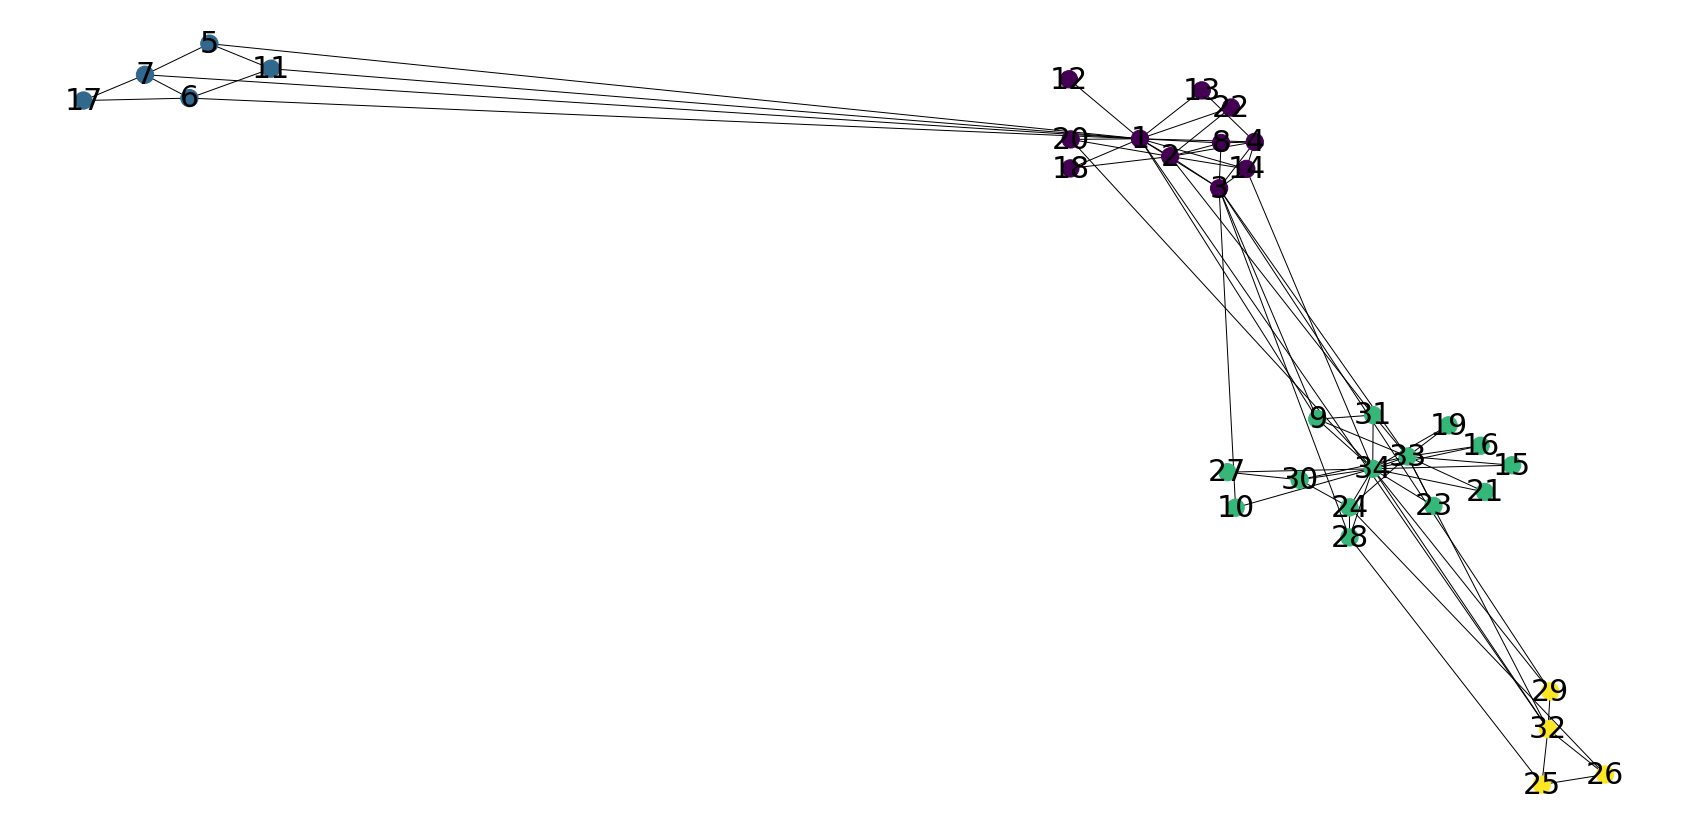

{1: array([-0.46814345, 12.33390433]),
 2: array([ 0.37491321, 11.23690425]),
 3: array([1.74252178, 9.26835718]),
 4: array([ 2.73921269, 12.14192538]),
 5: array([-26.48099385,  18.23097783]),
 6: array([-27.03952756,  14.85419548]),
 7: array([-28.28064336,  16.30199956]),
 8: array([ 1.79787045, 12.07596985]),
 9: array([ 4.48701682, -5.04008795]),
 10: array([  2.20425273, -10.52734149]),
 11: array([-24.76118802,  16.67919095]),
 12: array([-2.4541131 , 16.02198246]),
 13: array([ 1.25807962, 15.33336928]),
 14: array([ 2.50434164, 10.46684064]),
 15: array([ 9.93519883, -7.89636621]),
 16: array([ 9.05315785, -6.68481083]),
 17: array([-30.        ,  14.70571024]),
 18: array([-2.41456586, 10.49871711]),
 19: array([ 8.15898103, -5.42360376]),
 20: array([-2.40573559, 12.29552106]),
 21: array([ 9.17300736, -9.55491679]),
 22: array([ 2.07426863, 14.27062194]),
 23: array([  7.73409925, -10.41898962]),
 24: array([  5.38709371, -10.50653174]),
 25: array([ 10.76409546, -27.68771

In [29]:
def create_graph(A, communities):
    G=nx.Graph()
    
    for nodei in range(A.shape[0]):
        d = {"community": communities[nodei]}
        G.add_node(nodei+1, **d)
    
    for i, j in zip(*A.nonzero()):
        if communities[i] == communities[j]:
            weight = 100
        else:
            weight = 1
        G.add_edge(i+1, j+1, weight=weight)
        
    return G

def plot_graph(G, pos=None):
    plt.figure(figsize=(30,15))  
    
    node_communities = [d["community"] for _, d in G.nodes(data=True)]
    
    if pos==None:
        pos = nx.spring_layout(G, scale=30)  # positions for all nodes
    
    nx.draw_networkx_nodes(G, pos, node_color=node_communities)
    nx.draw_networkx_edges(G, pos)

    nx.draw_networkx_labels(G, pos, font_size=30, font_family='sans-serif')

    plt.axis('off')
    plt.show()
    
    return pos

G = create_graph(A, best_communities)
plot_graph(G)